## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

## NLTK resources

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Reading and Interpreting Data

In [3]:
# extracting and viewing data
df = pd.read_csv(r'C:\Users\eesha\Documents\Intern\Lumaa\imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# dropping cols that may not help much 
cols_to_drop = ['Poster_Link', 'Certificate', 'Runtime', 'Star3', 'Star4', 'Meta_score', 'No_of_Votes', 'Gross']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Overview,Director,Star1,Star2
0,The Shawshank Redemption,1994,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman
1,The Godfather,1972,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger
3,The Godfather: Part II,1974,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro
4,12 Angry Men,1957,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb


In [5]:
df.columns

Index(['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Overview',
       'Director', 'Star1', 'Star2'],
      dtype='object')

In [6]:
# checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Series_Title     0
Released_Year    0
Genre            0
IMDB_Rating      0
Overview         0
Director         0
Star1            0
Star2            0
dtype: int64


In [7]:
# reducing the data from 1000 rows to 500 rows - choosing random rows
# seeding for reproducibility 
df_sample = df.sample(n=500, random_state=42)  
df_sample.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Overview,Director,Star1,Star2
521,Trois couleurs: Bleu,1993,"Drama, Music, Mystery",7.9,A woman struggles to find a way to live her li...,Krzysztof Kieslowski,Juliette Binoche,Zbigniew Zamachowski
737,Captain America: The Winter Soldier,2014,"Action, Adventure, Sci-Fi",7.7,As Steve Rogers struggles to embrace his role ...,Anthony Russo,Joe Russo,Chris Evans
740,Wreck-It Ralph,2012,"Animation, Adventure, Comedy",7.7,A video game villain wants to be a hero and se...,Rich Moore,John C. Reilly,Jack McBrayer
660,The Sandlot,1993,"Comedy, Drama, Family",7.8,"In the summer of 1962, a new kid in town is ta...",David Mickey Evans,Tom Guiry,Mike Vitar
411,Gandhi,1982,"Biography, Drama, History",8.0,The life of the lawyer who became the famed le...,Richard Attenborough,Ben Kingsley,John Gielgud


C:\Users\eesha\AppData\Local\Temp\ipykernel_2388\2077442659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


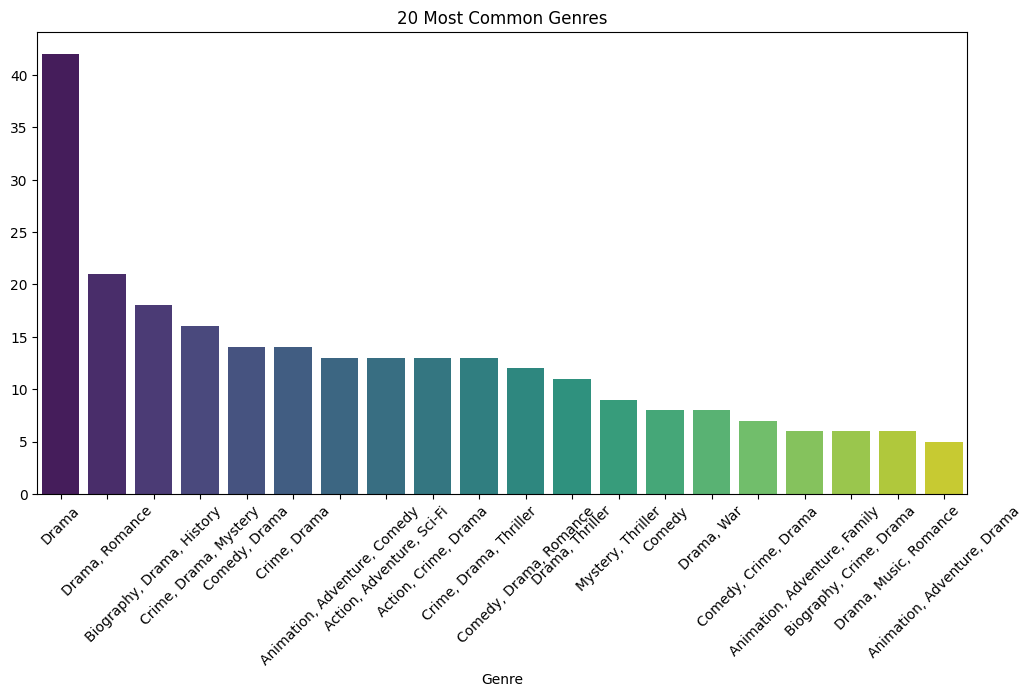

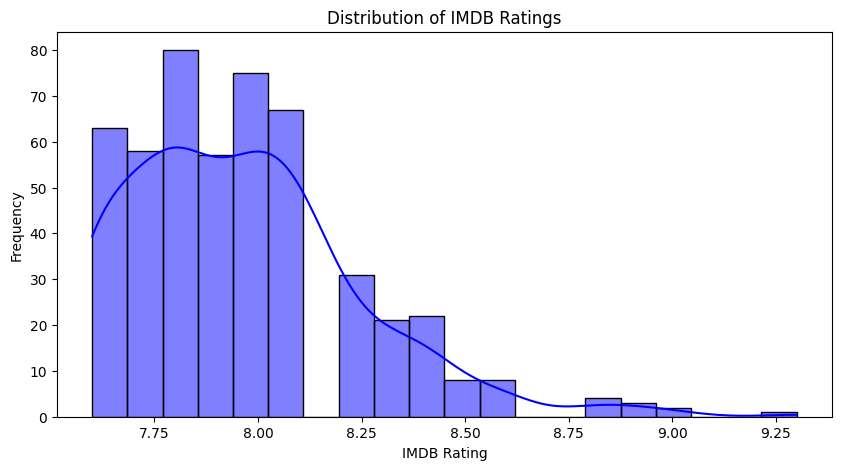

In [8]:
# visualization: Genre Distribution
plt.figure(figsize=(12, 6))
genre_counts = df_sample['Genre'].value_counts().head(20)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("20 Most Common Genres")
plt.show()

# visualization: IMDB Rating Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_sample['IMDB_Rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Frequency")
plt.show()

## Recommender

In [9]:
# looking at the overview column
df_sample['Overview'].head()

521    A woman struggles to find a way to live her li...
737    As Steve Rogers struggles to embrace his role ...
740    A video game villain wants to be a hero and se...
660    In the summer of 1962, a new kid in town is ta...
411    The life of the lawyer who became the famed le...
Name: Overview, dtype: object

In [10]:
# combining relevant columns to look at multiple aspects
df_sample['Combined_Features'] = (
    df_sample['Overview'] + " " +
    df_sample['Genre'] + " " +
    df_sample['Star1']
)

In [11]:
# converting to vector form
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_sample['Combined_Features'])
print(tfidf_matrix.shape)


(500, 4020)


that means we have about 4000 words to describe 500 movies

### recommending based on similarity score

In [32]:
def recommend_movies(user_input, df_sample, tfidf, min_rating, min_year):
    
    # vectorize the user input
    user_tfidf = tfidf.transform([user_input])  

    # compute cosine similarity between user input and movie overviews
    cosine_sim = cosine_similarity(user_tfidf, tfidf_matrix)

    # similarity scores
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 15 most similar movies
    movie_indices = [i[0] for i in sim_scores[:15]]  
    recos = df_sample.iloc[movie_indices][['Series_Title','IMDB_Rating', 'Released_Year']]

    # filtering based on rating and recency - based on user input
    recos = recos[
        (recos['IMDB_Rating'] >= min_rating) & 
        (recos['Released_Year'] >= min_year)
    ]
    
    # sorting based on rating - descending - top 5
    if len(recos) > 5:
        recos = recos[:5].sort_values(by='IMDB_Rating', ascending=False)
    else:
        recos = recos[:len(recos)].sort_values(by='IMDB_Rating', ascending=False)

    # to display the similarity scores as well
    recos['Similarity_Score'] = [score[1] for score in sim_scores[:len(recos)]]  
    
    # returning the relevant columns
    ret_recos = recos[['Series_Title', 'Similarity_Score']].reset_index(drop=True)

    if len(ret_recos) == 0:
        return "Sorry! No recommendations found based on the given criteria."
    
    return ret_recos

In [33]:
# example user input
user_input = input("What kind of movies would you like to watch?")
user_min_rating = float(input("Enter minimum IMDb rating (e.g., 7.0): "))
user_min_year = input("Enter minimum release year (e.g., 2000): ")

# calling the recommender
recommend_movies(user_input, df_sample, tfidf, user_min_rating, user_min_year)


,Series_Title,Similarity_Score
0,Blade Runner,0.150406
1,The Avengers,0.144849
2,Barton Fink,0.141691
3,Gravity,0.141660
4,Zelig,0.135840
